# Appendix A Code. Experiment Data and Preprocessing

## Raw Fluorescence Intensity

In [350]:
import pandas as pd
type = 0

if type == 0:
    ## Raw Fluorescence Intensity
    # Aerobic data 
    aerobic_data = {
        'fadr(5%)': [2.13502, 2.60424, 2.81794, 2.78924, 4.99021, 11.1636],
        'fadr': [1.97026, 1.98181, 1.7688, 2.47132, 2.0313, 11.3651],
        'Empty': [1.9135, 1.56346, 1.73828, 1.68255, 1.57981, 2.3511],
        'EcN': [1.78729, 1.81655, 1.8955, 1.76251, 2.13779, 3.20144]
    }

    # Anaerobic data
    anaerobic_data = {
        'fadr(5%)': [4.23406, 2.42249, 4.15185, 5.82371, 2.46091, 5.24601],
        'fadr': [1.9194, 1.82492, 1.76396, 1.80384, 1.61598, 1.43906],
        'Empty': [1.85137, 1.77825, 2.48325, 1.70242, 1.83656, 2.01658],
        'EcN': [1.53569, 1.41831, 1.69782, 2.52988, 1.45459, 1.69836]
    }


# Convert to DataFrame
df_aerobic = pd.DataFrame(aerobic_data)
df_anaerobic = pd.DataFrame(anaerobic_data)

df_aerobic, df_anaerobic


(   fadr(5%)      fadr    Empty      EcN
 0   2.13502   1.97026  1.91350  1.78729
 1   2.60424   1.98181  1.56346  1.81655
 2   2.81794   1.76880  1.73828  1.89550
 3   2.78924   2.47132  1.68255  1.76251
 4   4.99021   2.03130  1.57981  2.13779
 5  11.16360  11.36510  2.35110  3.20144,
    fadr(5%)     fadr    Empty      EcN
 0   4.23406  1.91940  1.85137  1.53569
 1   2.42249  1.82492  1.77825  1.41831
 2   4.15185  1.76396  2.48325  1.69782
 3   5.82371  1.80384  1.70242  2.52988
 4   2.46091  1.61598  1.83656  1.45459
 5   5.24601  1.43906  2.01658  1.69836)

In [351]:
from scipy.stats import zscore
import numpy as np

# Calculate Z-scores for aerobic and anaerobic data
z_aerobic = np.abs(zscore(df_aerobic))
z_anaerobic = np.abs(zscore(df_anaerobic))

# Identify outliers
outliers_aerobic = np.where(z_aerobic > 3)
outliers_anaerobic = np.where(z_anaerobic > 3)

outliers_aerobic, outliers_anaerobic


((array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)))

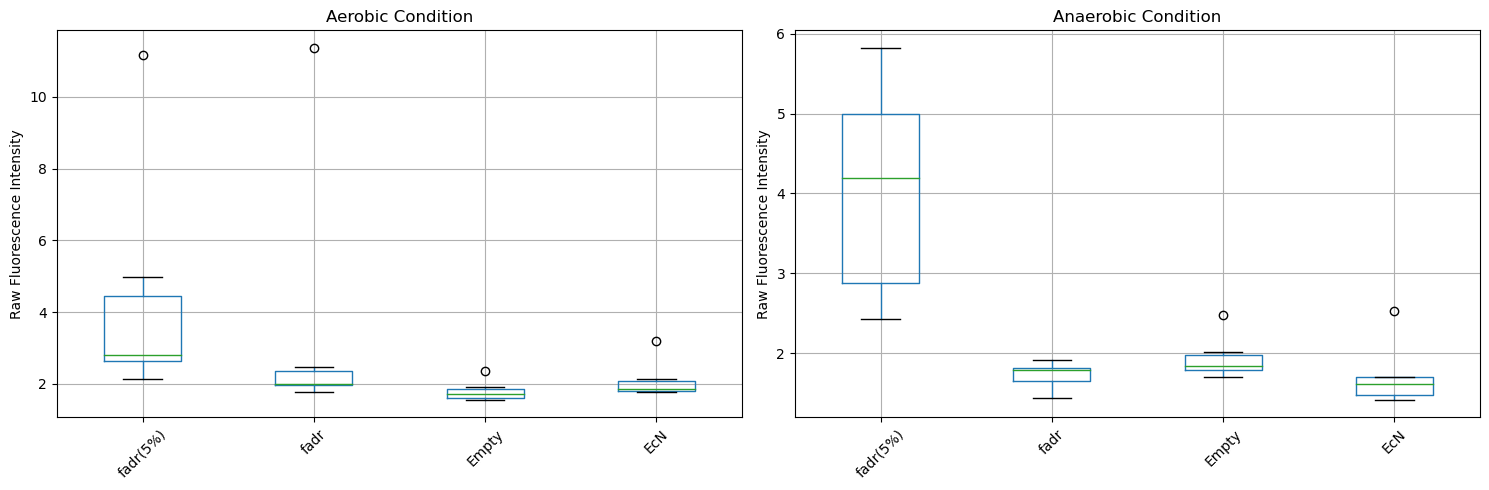

In [352]:
import matplotlib.pyplot as plt

# Plotting box plots for aerobic and anaerobic data
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Aerobic data box plot
df_aerobic.boxplot(ax=ax[0])
ax[0].set_title('Aerobic Condition')
ax[0].set_ylabel('Raw Fluorescence Intensity')
ax[0].set_xticklabels(df_aerobic.columns, rotation=45)

# Anaerobic data box plot
df_anaerobic.boxplot(ax=ax[1])
ax[1].set_title('Anaerobic Condition')
ax[1].set_ylabel('Raw Fluorescence Intensity')
ax[1].set_xticklabels(df_anaerobic.columns, rotation=45)

plt.tight_layout()
plt.show()


In [353]:
# List to store the locations of outliers
outlier_positions = []
print("df_aerobic processing")

# Imputing potential outliers in the aerobic data using median and storing their positions
for column in df_aerobic.columns:
    median_value = df_aerobic[column].median()
    Q1 = df_aerobic[column].quantile(0.25)
    Q3 = df_aerobic[column].quantile(0.75)
    IQR = Q3 - Q1
    
    for i, value in enumerate(df_aerobic[column]):
        if (value < (Q1 - 1.5 * IQR)) or (value > (Q3 + 1.5 * IQR)):
        # if (value < (Q1 - 0.5 * IQR)) or (value > (Q3 + 0.5 * IQR)):
            outlier_positions.append((i, column))
            df_aerobic.at[i, column] = median_value
# outlier_positions, df_aerobic

df_aerobic processing


In [354]:
# Display the positions of detected outliers and the imputed aerobic data

# List to store the locations of outliers
outlier_positions = []
print("df_anaerobic processing")

# Imputing potential outliers in the aerobic data using median and storing their positions
for column in df_anaerobic.columns:
    median_value = df_anaerobic[column].median()
    Q1 = df_anaerobic[column].quantile(0.25)
    Q3 = df_anaerobic[column].quantile(0.75)
    IQR = Q3 - Q1
    
    for i, value in enumerate(df_anaerobic[column]):
        if (value < (Q1 - 1.5 * IQR)) or (value > (Q3 + 1.5 * IQR)):
        # if (value < (Q1 - 0.5 * IQR)) or (value > (Q3 + 0.5 * IQR)):
            outlier_positions.append((i, column))
            df_anaerobic.at[i, column] = median_value

# Display the positions of detected outliers and the imputed aerobic data
# outlier_positions, df_anaerobic


df_anaerobic processing


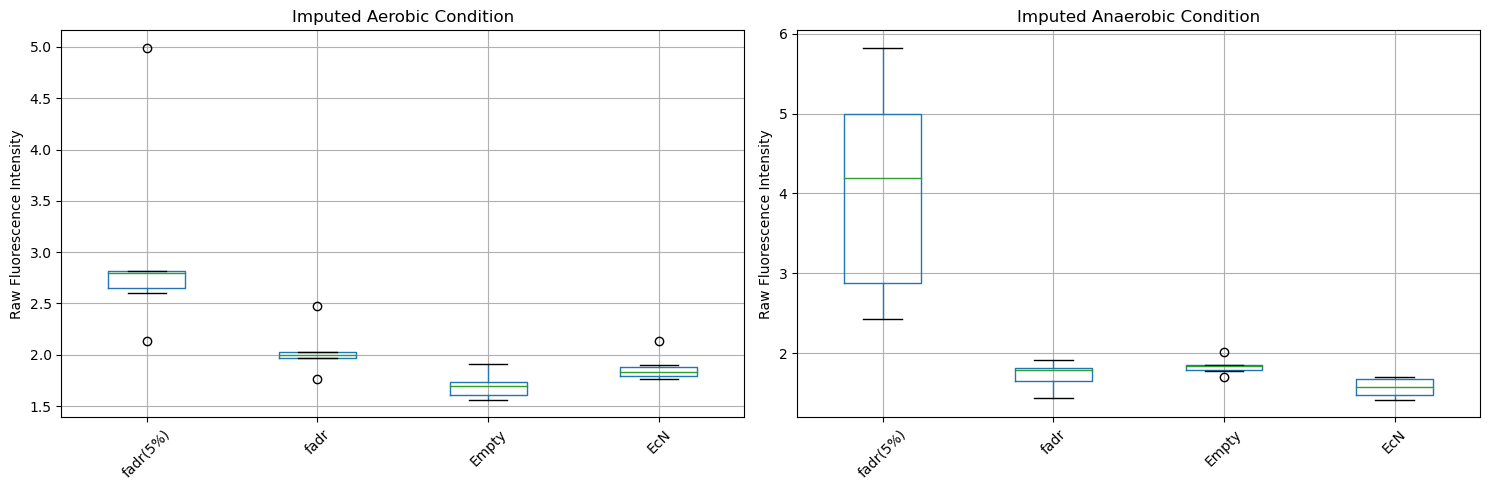

In [355]:
# Plotting box plots for the imputed aerobic data and the anaerobic data
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Imputed Aerobic data box plot
df_aerobic.boxplot(ax=ax[0])
ax[0].set_title('Imputed Aerobic Condition')
ax[0].set_ylabel('Raw Fluorescence Intensity')
ax[0].set_xticklabels(df_aerobic.columns, rotation=45)

# Anaerobic data box plot
df_anaerobic.boxplot(ax=ax[1])
ax[1].set_title('Imputed Anaerobic Condition')
ax[1].set_ylabel('Raw Fluorescence Intensity')
ax[1].set_xticklabels(df_anaerobic.columns, rotation=45)

plt.tight_layout()
plt.show()


In [356]:
Fluorescence_aerobic, Fluorescence_anaerobic = df_aerobic, df_anaerobic
Fluorescence_aerobic, Fluorescence_anaerobic

(   fadr(5%)      fadr     Empty       EcN
 0   2.13502  1.970260  1.913500  1.787290
 1   2.60424  1.981810  1.563460  1.816550
 2   2.81794  1.768800  1.738280  1.895500
 3   2.78924  2.471320  1.682550  1.762510
 4   4.99021  2.031300  1.579810  2.137790
 5   2.80359  2.006555  1.710415  1.856025,
    fadr(5%)     fadr     Empty       EcN
 0   4.23406  1.91940  1.851370  1.535690
 1   2.42249  1.82492  1.778250  1.418310
 2   4.15185  1.76396  1.843965  1.697820
 3   5.82371  1.80384  1.702420  1.616755
 4   2.46091  1.61598  1.836560  1.454590
 5   5.24601  1.43906  2.016580  1.698360)

## OD600

In [357]:
## OD600
# Aerobic data
aerobic_OD600 = {
    'fadr(5%)': [1.32011, 1.16249, 1.065, 1.08396, 0.545955, 0.481853],
    'fadr': [1.1399, 1.17597, 1.11532, 1.14741, 1.01773, 0.31297],
    'Empty': [1.40997, 1.32208, 1.33487, 1.3489, 1.35377, 0.811972],
    'EcN': [1.346, 1.25089, 1.19777, 1.24477, 1.19733, 0.610123]
}

# Anaerobic data
anaerobic_OD600 = {
    'EcN': [1.21977, 1.26148, 1.29341, 1.31892, 1.28512, 1.31125],
    'Empty': [1.35863, 1.28598, 1.2782, 1.34398, 1.33374, 1.33967],
    'fadr': [1.3057, 1.34832, 1.38101, 1.37427, 1.36229, 1.39281],
    'fadr(5%)': [1.25015, 1.25167, 1.09076, 1.02833, 1.04294, 0.943919]
}

# Convert to DataFrame
df_aerobic = pd.DataFrame(aerobic_OD600)
df_anaerobic = pd.DataFrame(anaerobic_OD600)

# df_aerobic, df_anaerobic


In [358]:
from scipy.stats import zscore
import numpy as np

# Calculate Z-scores for aerobic and anaerobic data
z_aerobic = np.abs(zscore(df_aerobic))
z_anaerobic = np.abs(zscore(df_anaerobic))

# Identify outliers
outliers_aerobic = np.where(z_aerobic > 3)
outliers_anaerobic = np.where(z_anaerobic > 3)
outliers_aerobic, outliers_anaerobic


((array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)))

In [359]:
from scipy.stats import zscore
import numpy as np

# Calculate Z-scores for aerobic and anaerobic data
z_aerobic = np.abs(zscore(df_aerobic))
z_anaerobic = np.abs(zscore(df_anaerobic))

# Identify outliers
outliers_aerobic = np.where(z_aerobic > 3)
outliers_anaerobic = np.where(z_anaerobic > 3)

outliers_aerobic, outliers_anaerobic

((array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)))

In [360]:
# List to store the locations of outliers
outlier_positions = []
print("df_aerobic processing")

# Imputing potential outliers in the aerobic data using median and storing their positions
for column in df_aerobic.columns:
    median_value = df_aerobic[column].median()
    Q1 = df_aerobic[column].quantile(0.25)
    Q3 = df_aerobic[column].quantile(0.75)
    IQR = Q3 - Q1
    
    for i, value in enumerate(df_aerobic[column]):
        if (value < (Q1 - 1.5 * IQR)) or (value > (Q3 + 1.5 * IQR)):
            outlier_positions.append((i, column))
            df_aerobic.at[i, column] = median_value
            
# outlier_positions, df_aerobic

df_aerobic processing


In [361]:
# Display the positions of detected outliers and the imputed aerobic data

# List to store the locations of outliers
outlier_positions = []
print("df_anaerobic processing")

# Imputing potential outliers in the aerobic data using median and storing their positions
for column in df_anaerobic.columns:
    median_value = df_anaerobic[column].median()
    Q1 = df_anaerobic[column].quantile(0.25)
    Q3 = df_anaerobic[column].quantile(0.75)
    IQR = Q3 - Q1
    
    for i, value in enumerate(df_anaerobic[column]):
        if (value < (Q1 - 1.5 * IQR)) or (value > (Q3 + 1.5 * IQR)):
            outlier_positions.append((i, column))
            df_anaerobic.at[i, column] = median_value

# Display the positions of detected outliers and the imputed aerobic data
# outlier_positions, df_anaerobic


df_anaerobic processing


In [362]:
Fluorescence_aerobic, Fluorescence_anaerobic

(   fadr(5%)      fadr     Empty       EcN
 0   2.13502  1.970260  1.913500  1.787290
 1   2.60424  1.981810  1.563460  1.816550
 2   2.81794  1.768800  1.738280  1.895500
 3   2.78924  2.471320  1.682550  1.762510
 4   4.99021  2.031300  1.579810  2.137790
 5   2.80359  2.006555  1.710415  1.856025,
    fadr(5%)     fadr     Empty       EcN
 0   4.23406  1.91940  1.851370  1.535690
 1   2.42249  1.82492  1.778250  1.418310
 2   4.15185  1.76396  1.843965  1.697820
 3   5.82371  1.80384  1.702420  1.616755
 4   2.46091  1.61598  1.836560  1.454590
 5   5.24601  1.43906  2.016580  1.698360)

In [363]:
OD600_aerobic, OD600_anaerobic = df_aerobic, df_anaerobic
OD600_aerobic, OD600_anaerobic

(   fadr(5%)     fadr     Empty      EcN
 0  1.320110  1.13990  1.341885  1.22127
 1  1.162490  1.17597  1.322080  1.25089
 2  1.065000  1.11532  1.334870  1.19777
 3  1.083960  1.14741  1.348900  1.24477
 4  0.545955  1.01773  1.353770  1.19733
 5  0.481853  1.12761  1.341885  1.22127,
        EcN    Empty     fadr  fadr(5%)
 0  1.21977  1.35863  1.36828  1.250150
 1  1.26148  1.28598  1.34832  1.251670
 2  1.29341  1.27820  1.38101  1.090760
 3  1.31892  1.34398  1.37427  1.028330
 4  1.28512  1.33374  1.36229  1.042940
 5  1.31125  1.33967  1.39281  0.943919)

## Data calculation

对于这里的数据，我们需要计算绝对荧光强度，需要首先将各自的Raw Fluorescence Intensity数据除以OD600数据得到绝对荧光强度值，然后再用fadr(5%)  的数据减去 fadr的背景值，即得到最终fadr(5%)的荧光强度值

In [364]:
Fluorescence_aerobic = Fluorescence_aerobic.mean()
Fluorescence_anaerobic = Fluorescence_anaerobic.mean()
OD600_aerobic = OD600_aerobic.mean()
OD600_anaerobic = OD600_anaerobic.mean()

# Calculating the absolute fluorescence intensity for aerobic and anaerobic
absolute_fluorescence_aerobic = Fluorescence_aerobic.divide(OD600_aerobic)
absolute_fluorescence_anaerobic = Fluorescence_anaerobic.divide(OD600_anaerobic)

# Correcting the fadr(5%) fluorescence intensity by subtracting fadr's background value
corrected_fadr5_aerobic = absolute_fluorescence_aerobic['fadr(5%)'] - absolute_fluorescence_aerobic['Empty']
corrected_fadr5_anaerobic = absolute_fluorescence_anaerobic['fadr(5%)'] - absolute_fluorescence_anaerobic['Empty']

corrected_fadr5_aerobic = Fluorescence_aerobic['fadr(5%)'] - Fluorescence_aerobic['Empty']
corrected_fadr5_anaerobic = Fluorescence_anaerobic['fadr(5%)'] - Fluorescence_anaerobic['Empty']

corrected_fadr5_aerobic = absolute_fluorescence_aerobic['fadr(5%)'] - Fluorescence_aerobic['Empty']
corrected_fadr5_anaerobic = absolute_fluorescence_anaerobic['fadr(5%)'] - Fluorescence_anaerobic['Empty']

In [365]:
corrected_fadr5_aerobic, corrected_fadr5_anaerobic

(1.5073448108658074, 1.8452051812670545)